In [3]:
import os
import pandas as pd

def concatenate_csv_files(directory_path):
    all_dataframes = []

    # Walk over all files in the directory
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            # Check if the file is a CSV file
            if file == "all.csv":
                file_path = os.path.join(root, file)
                # Read the CSV file and append to the list of DataFrames
                df = pd.read_csv(file_path)
                all_dataframes.append(df)

    # Check if there are any CSV files found
    if not all_dataframes:
        print("No CSV files found in the directory.")
        return None

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)
    concatenated_df = concatenated_df.drop_duplicates(subset='java_file', keep='first')

    return concatenated_df

# Specify the directory path where you want to search for CSV files
directory_path = "/home/rmg/cam/data"

# Call the function to concatenate CSV files
result_df = concatenate_csv_files(directory_path)

# Display the result DataFrame

/tmp/ipykernel_1869/1879663647.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,repo,java_file,acoco,CAMC,CAMC-cvc,cc,coco,fout,hsd,hse,...,MMAC,MMAC-cvc,mncoco,mxcoco,NHD,NHD-cvc,nobl,nocl,SCOM,SCOM-cvc
0,apache/camel,/dsl/camel-jbang/camel-jbang-console/src/main/...,-,-,-,2,-,0,10.679,3097.300,...,-,-,-,-,-,-,2,0,-,-
1,apache/camel,/dsl/camel-jbang/camel-jbang-console/src/main/...,-,-,-,16,-,0,25.323,65200.797,...,-,-,-,-,-,-,2,3,-,-
2,apache/camel,/dsl/camel-jbang/camel-jbang-console/src/main/...,-,-,-,19,-,0,26.316,86547.160,...,-,-,-,-,-,-,3,3,-,-
3,apache/camel,/dsl/camel-jbang/camel-jbang-console/src/main/...,-,-,-,2,-,0,11.917,3154.339,...,-,-,-,-,-,-,0,0,-,-
4,apache/camel,/dsl/camel-jbang/camel-jbang-console/src/main/...,-,-,-,4,-,0,9.842,4249.884,...,-,-,-,-,-,-,0,1,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426758,NaN,/src/main/java/edu/princeton/cs/algs4/BinaryOu...,-,-,-,1,-,0,13.500,8460.174,...,-,-,-,-,-,-,0,0,-,-
426759,NaN,/src/main/java/edu/princeton/cs/algs4/LinkedSt...,-,-,-,2,-,0,8.556,1405.107,...,-,-,-,-,-,-,0,0,-,-
426760,NaN,/src/main/java/edu/princeton/cs/algs4/Sequenti...,-,-,-,2,-,0,11.400,2643.551,...,-,-,-,-,-,-,0,0,-,-
426761,NaN,/src/main/java/edu/princeton/cs/algs4/BreadthF...,-,-,-,11,-,0,60.167,111982.730,...,-,-,-,-,-,-,4,5,-,-


In [4]:
df = result_df[result_df['repo'].isna()]

# Display the updated DataFrame
df.shape

(302805, 26)

In [16]:
df.to_csv('result_data.csv', index=False)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61979 entries, 0 to 61978
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   repo       61979 non-null  object 
 1   java_file  61979 non-null  object 
 2   acoco      61979 non-null  object 
 3   CAMC       61979 non-null  object 
 4   CAMC-cvc   61979 non-null  object 
 5   cc         61979 non-null  object 
 6   coco       61979 non-null  object 
 7   fout       61979 non-null  int64  
 8   hsd        61979 non-null  float64
 9   hse        61979 non-null  float64
 10  hsv        61979 non-null  float64
 11  java       61979 non-null  object 
 12  LCOM5      61979 non-null  object 
 13  LCOM5-cvc  61979 non-null  object 
 14  loc        61979 non-null  int64  
 15  midx       61979 non-null  float64
 16  MMAC       61979 non-null  object 
 17  MMAC-cvc   61979 non-null  object 
 18  mncoco     61979 non-null  object 
 19  mxcoco     61979 non-null  object 
 20  NHD   

In [96]:
df.shape

(302805, 26)

In [18]:
df[["java_file", "cc", "nobl", "coco"]].isnull().any().any()

False

In [116]:
import matplotlib.pyplot as plt
def plot_scatter(df, xaxis, yaxis):
    filtered_df = df[df[xaxis].notna() & (df[xaxis] != '-') & df[yaxis].notna() & (df[yaxis] != '-')]
    filtered_df.loc[:, xaxis] = filtered_df.loc[:, xaxis].astype(int)
    filtered_df.loc[:, yaxis] = filtered_df.loc[:, yaxis].astype(int)
    print(filtered_df.shape)
    plt.scatter(filtered_df[xaxis], filtered_df[yaxis])
    plt.xlabel(xaxis)  # Label for the x-axis
    plt.ylabel(yaxis)    # Label for the y-axis
    # plt.ylim(ymin=0, ymax=200) 
    plt.title(f"Scatter Plot of {yaxis} vs {xaxis}")
    plt.show()

def count_corr(df, column_list):
    # Filter rows based on conditions for specified columns
    filtered_df = df[df[column_list].notna().all(axis=1) & (df[column_list] != '-').all(axis=1)]
    # Convert the specified columns to float
    filtered_df.loc[:, column_list] = filtered_df.loc[:, column_list].astype(float)
    # Calculate correlation for specific columns
    correlation_matrix = filtered_df[column_list].corr()
    return correlation_matrix

(302397, 26)


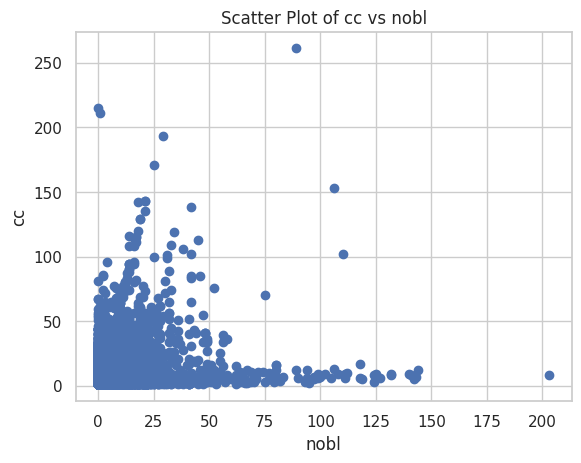

In [117]:
plot_scatter(df, "nobl", "cc")

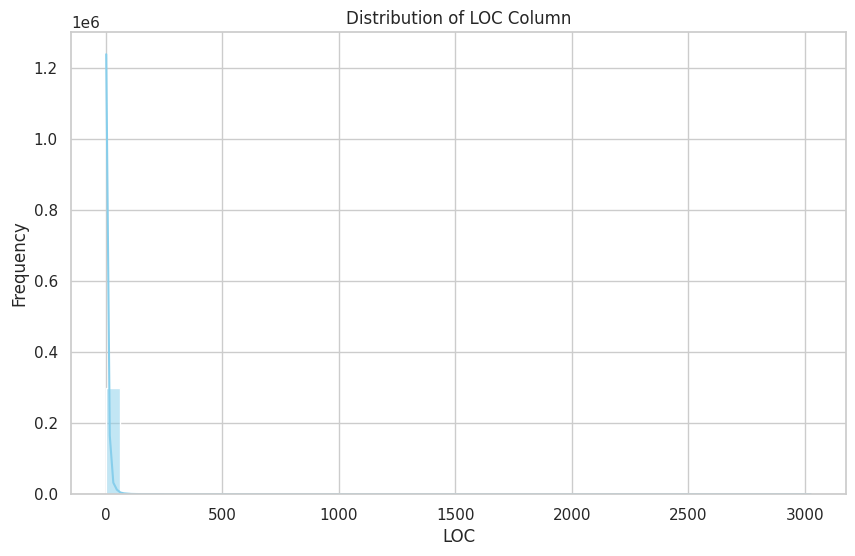

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the distribution of the 'loc' column
sns.histplot(df['loc'], kde=True, color='skyblue', bins=50)

plt.title('Distribution of LOC Column')
plt.xlabel('LOC')
plt.ylabel('Frequency')
plt.show()


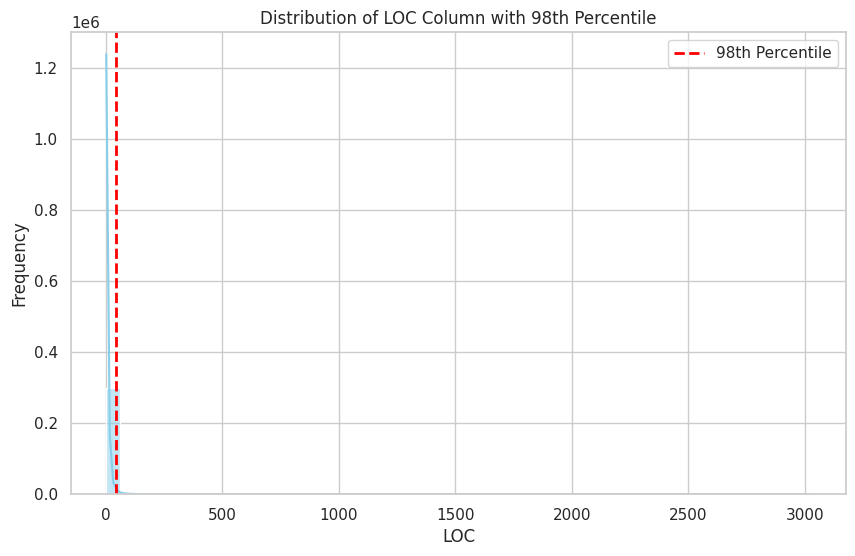

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the 98th percentile of the 'loc' column
percentile_98 = df['loc'].quantile(0.98)

# Plotting the distribution of the 'loc' column
sns.histplot(df['loc'], kde=True, color='skyblue', bins=50)

# Adding a vertical line at the 98th percentile
plt.axvline(percentile_98, color='red', linestyle='dashed', linewidth=2, label='98th Percentile')

plt.title('Distribution of LOC Column with 98th Percentile')
plt.xlabel('LOC')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [120]:
# Assuming your DataFrame is named 'df'
# Calculate the 5th and 95th percentiles of the 'loc' column
loc_5th_percentile = df['loc'].quantile(0.02)
loc_95th_percentile = df['loc'].quantile(0.98)

# Filter the DataFrame based on the condition
percent_df = df[(df['loc'] >= 5) & (df['loc'] < loc_95th_percentile)]

# Display or further manipulate the filtered DataFrame as needed
percent_df.shape

(108434, 26)

In [121]:
min(percent_df['loc']), max(percent_df['loc'])

(5, 40)

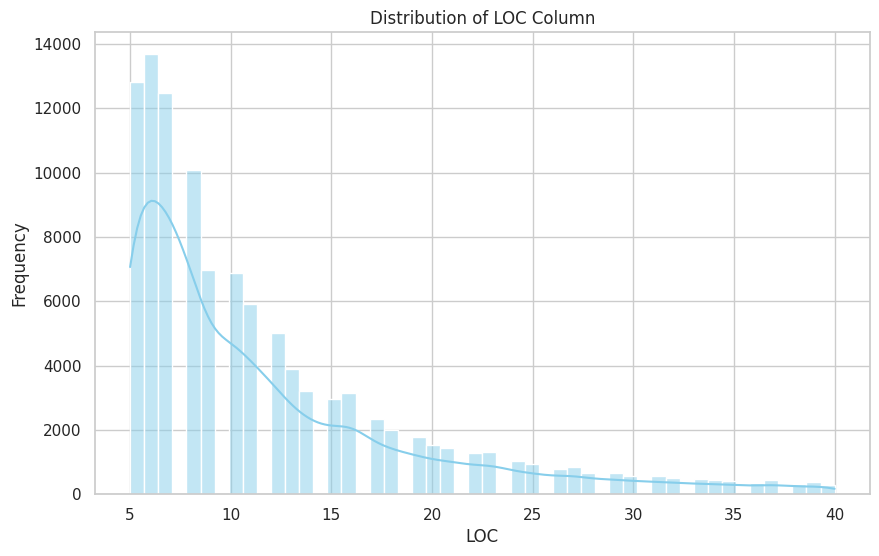

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the distribution of the 'loc' column
sns.histplot(percent_df['loc'], kde=True, color='skyblue', bins=50)

plt.title('Distribution of LOC Column')
plt.xlabel('LOC')
plt.ylabel('Frequency')
plt.show()


(108374, 26)


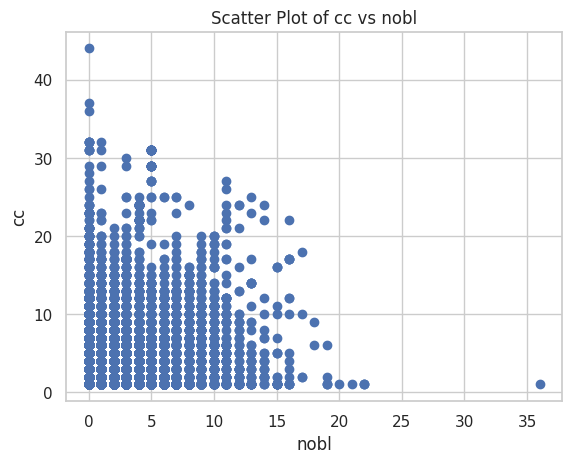

In [123]:
plot_scatter(percent_df, "nobl", "cc")

In [124]:
count_corr(percent_df, ["nobl", "nocl", "cc", "hse", "hsd"])

,nobl,nocl,cc,hse,hsd
nobl,1.000000,0.382243,0.235122,0.437582,0.340482
nocl,0.382243,1.000000,0.170115,0.248394,0.178624
cc,0.235122,0.170115,1.000000,0.387290,0.466727
hse,0.437582,0.248394,0.387290,1.000000,0.740295
hsd,0.340482,0.178624,0.466727,0.740295,1.000000


In [98]:
# Table of distribution using value_counts
distribution_table = df['loc'].value_counts().reset_index()
distribution_table.columns = ['LOC', 'Frequency']
distribution_table

,LOC,Frequency
0,3,145949
1,4,26168
2,6,13680
3,5,12810
4,7,12489
...,...,...
373,228,1
374,646,1
375,843,1
376,268,1


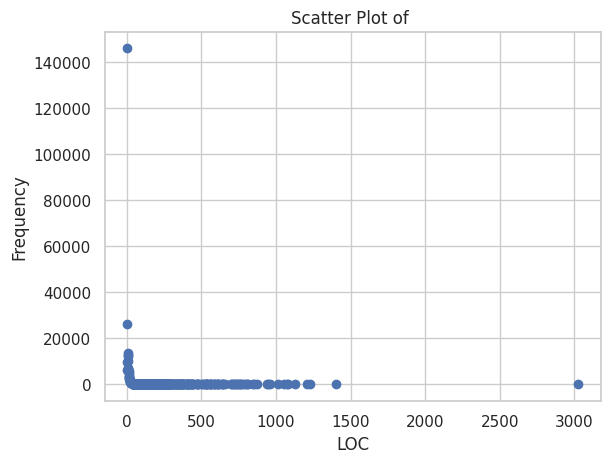

In [99]:
plt.scatter(distribution_table["LOC"], distribution_table["Frequency"])
plt.xlabel("LOC")  # Label for the x-axis
plt.ylabel("Frequency")    # Label for the y-axis
# plt.ylim(ymin=0, ymax=200) 
plt.title(f"Scatter Plot of ")
plt.show()